# Bot-IoT dataset

## First analysis 

In [30]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

The following text file has been extracted from https://github.com/polvalls9/Transfer-Learning-Based-Intrusion-Detection-in-5G-and-IoT-Networks/tree/main/datasets:

In [31]:
bot = pd.read_csv('../datasets/Bot-IoT/BoT-IoT.txt', sep = ',', low_memory=False)

In [3]:
bot.head()

,Unnamed: 0,proto,saddr,sport,daddr,dport,spkts,dpkts,sbytes,dbytes,state,stime,ltime,dur,attack,category
0,0,udp,192.168.100.150,21847,192.168.100.3,80,7,0,420,0,INT,1.528100e+09,1.528100e+09,15.389218,1,DDoS
1,1,udp,192.168.100.147,8532,192.168.100.7,80,2,0,120,0,INT,1.528102e+09,1.528102e+09,7.553724,1,DDoS
2,2,tcp,192.168.100.147,53146.0,192.168.100.5,80.0,5,0,770,0,REQ,1.528097e+09,1.528097e+09,25.052450,1,DDoS
3,3,tcp,192.168.100.148,37167.0,192.168.100.3,80.0,2,0,308,0,REQ,1.528096e+09,1.528096e+09,3.642605,1,DDoS
4,4,udp,192.168.100.148,20595.0,192.168.100.3,80.0,13,0,780,0,INT,1.528100e+09,1.528100e+09,14.673398,1,DDoS


In [32]:
# Delete the first column 
bot = bot.drop(bot.columns[0], axis=1)

In [5]:
# Count the frequency of each value in the 'category' column
freq = bot['category'].value_counts()
freq

DDoS              2000000
DoS               2000000
Reconnaissance    1821639
Normal               9543
Theft                1587
Name: category, dtype: int64

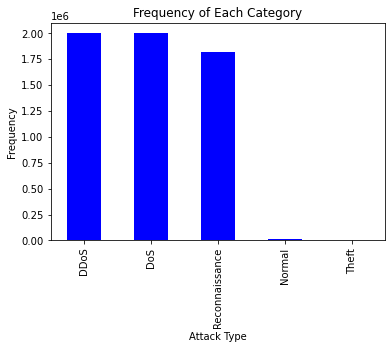

In [6]:
# Plot frequency of each attack 
freq.plot(kind='bar', color='blue')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')
plt.show()

In [7]:
# Get number of rows and name of columns
print(bot.shape)
print(bot.columns)

# Get if nulls or not
print(bot.isnull().sum())

(5832769, 15)
Index(['proto', 'saddr', 'sport', 'daddr', 'dport', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'state', 'stime', 'ltime', 'dur', 'attack', 'category'],
      dtype='object')
proto          0
saddr          0
sport       1045
daddr          0
dport       1045
spkts          0
dpkts          0
sbytes         0
dbytes         0
state          0
stime          0
ltime          0
dur            0
attack         0
category       0
dtype: int64


In [33]:
def filter(dataset): 
    # Get only the rows that contain state (PAR, ACC, ECO, CON, FIN, INT, REQ, RST) and proto (igmp, arp, icmp, udp, tcp, ipv6-icmp, rarp)
    dataset = dataset[dataset['state'].isin(['PAR', 'ACC', 'ECO', 'CON', 'FIN', 'INT', 'REQ', 'RST'])]
    dataset = dataset[dataset['proto'].isin(['igmp', 'arp', 'icmp', 'udp', 'tcp', 'ipv6-icmp', 'rarp'])]
    return dataset

In [34]:
bot = filter(bot)

In [10]:
bot['category'].value_counts()

DDoS              1999989
DoS               1999980
Reconnaissance    1791310
Normal               9446
Theft                1587
Name: category, dtype: int64

In [35]:
ddos = bot.loc[bot['category'] == 'DDoS']
dos = bot.loc[bot['category'] == 'DoS']
reconnaissance = bot.loc[bot['category'] == 'Reconnaissance']
normal = bot.loc[bot['category'] == 'Normal']
theft = bot.loc[bot['category'] == 'Theft']

ddos = ddos.sample(n=10000, random_state=1)
dos = dos.sample(n=10000, random_state=1)
reconnaissance = reconnaissance.sample(n=10000, random_state=1)

data = pd.concat([ddos, dos, reconnaissance, normal, theft], ignore_index=True)

In [36]:
train = data.sample(frac=0.75, random_state=1)
test = data.drop(train.index)

In [37]:
train['category'].value_counts()

DoS               7551
DDoS              7507
Reconnaissance    7475
Normal            7039
Theft             1203
Name: category, dtype: int64

In [38]:
bot = train 
test.to_csv('../datasets/Bot-IoT/Bot_test.csv', index=False)

## Partitions

### 3 nodes

#### For detection

In [39]:
ddos1 = bot[bot['category'] == 'DDoS'].iloc[:2517]
ddos2 = bot[bot['category'] == 'DDoS'].iloc[2517:2517*2]
ddos3 = bot[bot['category'] == 'DDoS'].iloc[2517*2:]

dos1 = bot[bot['category'] == 'DoS'].iloc[:2502]
dos2 = bot[bot['category'] == 'DoS'].iloc[2502:2502*2]
dos3 = bot[bot['category'] == 'DoS'].iloc[2502*2:]

recon1 = bot[bot['category'] == 'Reconnaissance'].iloc[:2492]
recon2 = bot[bot['category'] == 'Reconnaissance'].iloc[2492:2492*2]
recon3 = bot[bot['category'] == 'Reconnaissance'].iloc[2492*2:]

normal1 = bot[bot['category'] == 'Normal'].iloc[:2346]
normal2 = bot[bot['category'] == 'Normal'].iloc[2346:2346*2]
normal3 = bot[bot['category'] == 'Normal'].iloc[2346*2:]

theft1 = bot[bot['category'] == 'Theft'].iloc[:401]
theft2 = bot[bot['category'] == 'Theft'].iloc[401:401*2]
theft3 = bot[bot['category'] == 'Theft'].iloc[401*2:]

In [40]:
part1 = pd.concat([ddos1, dos1, recon1, normal1, theft1])
part2 = pd.concat([ddos2, dos2, recon2, normal2, theft2])
part3 = pd.concat([ddos3, dos3, recon3, normal3, theft3])

part1.to_csv('../datasets/Bot-IoT/pred3_part1.csv', index=False)
part2.to_csv('../datasets/Bot-IoT/pred3_part2.csv', index=False)
part3.to_csv('../datasets/Bot-IoT/pred3_part3.csv', index=False)

#### For attack classification

In [41]:
ddos1 = bot[bot['category'] == 'DDoS'].iloc[:2517]
ddos2 = bot[bot['category'] == 'DDoS'].iloc[2517:2517*2]
ddos3 = bot[bot['category'] == 'DDoS'].iloc[2517*2:]

dos1 = bot[bot['category'] == 'DoS'].iloc[:2502]
dos2 = bot[bot['category'] == 'DoS'].iloc[2502:2502*2]
dos3 = bot[bot['category'] == 'DoS'].iloc[2502*2:]

recon1 = bot[bot['category'] == 'Reconnaissance'].iloc[:2492]
recon2 = bot[bot['category'] == 'Reconnaissance'].iloc[2492:2492*2]
recon3 = bot[bot['category'] == 'Reconnaissance'].iloc[2492*2:]

theft1 = bot[bot['category'] == 'Theft'].iloc[:401]
theft2 = bot[bot['category'] == 'Theft'].iloc[401:401*2]
theft3 = bot[bot['category'] == 'Theft'].iloc[401*2:]

In [42]:
part1 = pd.concat([ddos1, dos1, recon1, theft1])
part2 = pd.concat([ddos2, dos2, recon2, theft2])
part3 = pd.concat([ddos3, dos3, recon3, theft3])

part1.to_csv('../datasets/Bot-IoT/cat3_part1.csv', index=False)
part2.to_csv('../datasets/Bot-IoT/cat3_part2.csv', index=False)
part3.to_csv('../datasets/Bot-IoT/cat3_part3.csv', index=False)

### 5 nodes

#### For detection

In [43]:
ddos1 = bot[bot['category'] == 'DDoS'].iloc[:1510]
ddos2 = bot[bot['category'] == 'DDoS'].iloc[1510:1510*2]
ddos3 = bot[bot['category'] == 'DDoS'].iloc[1510*2:1510*3]
ddos4 = bot[bot['category'] == 'DDoS'].iloc[1510*3:1510*4]
ddos5 = bot[bot['category'] == 'DDoS'].iloc[1510*4:]

dos1 = bot[bot['category'] == 'DoS'].iloc[:1501]
dos2 = bot[bot['category'] == 'DoS'].iloc[1501:1501*2]
dos3 = bot[bot['category'] == 'DoS'].iloc[1501*2:1501*3]
dos4 = bot[bot['category'] == 'DoS'].iloc[1501*3:1501*4+1]
dos5 = bot[bot['category'] == 'DoS'].iloc[1501*4+1:]

recon1 = bot[bot['category'] == 'Reconnaissance'].iloc[:1495]
recon2 = bot[bot['category'] == 'Reconnaissance'].iloc[1495:1495*2]
recon3 = bot[bot['category'] == 'Reconnaissance'].iloc[1495*2:1495*3]
recon4 = bot[bot['category'] == 'Reconnaissance'].iloc[1495*3:1495*4]
recon5 = bot[bot['category'] == 'Reconnaissance'].iloc[1495*4:]

normal1 = bot[bot['category'] == 'Normal'].iloc[:1407]
normal2 = bot[bot['category'] == 'Normal'].iloc[1407:1407*2]
normal3 = bot[bot['category'] == 'Normal'].iloc[1407*2:1407*3]
normal4 = bot[bot['category'] == 'Normal'].iloc[1407*3:1407*4]
normal5 = bot[bot['category'] == 'Normal'].iloc[1407*4:]

theft1 = bot[bot['category'] == 'Theft'].iloc[:241]
theft2 = bot[bot['category'] == 'Theft'].iloc[241:241*2]
theft3 = bot[bot['category'] == 'Theft'].iloc[241*2:241*3]
theft4 = bot[bot['category'] == 'Theft'].iloc[241*3:241*4-1]
theft5 = bot[bot['category'] == 'Theft'].iloc[241*4-1:]



In [44]:
part1 = pd.concat([ddos1, dos1, recon1, normal1, theft1])
part2 = pd.concat([ddos2, dos2, recon2, normal2, theft2])
part3 = pd.concat([ddos3, dos3, recon3, normal3, theft3])
part4 = pd.concat([ddos4, dos4, recon4, normal4, theft4])
part5 = pd.concat([ddos5, dos5, recon5, normal5, theft5])

part1.to_csv('../datasets/Bot-IoT/pred5_part1.csv', index=False)
part2.to_csv('../datasets/Bot-IoT/pred5_part2.csv', index=False)
part3.to_csv('../datasets/Bot-IoT/pred5_part3.csv', index=False)
part4.to_csv('../datasets/Bot-IoT/pred5_part4.csv', index=False)
part5.to_csv('../datasets/Bot-IoT/pred5_part5.csv', index=False)

#### For attack classification

In [45]:
ddos1 = bot[bot['category'] == 'DDoS'].iloc[:1510]
ddos2 = bot[bot['category'] == 'DDoS'].iloc[1510:1510*2]
ddos3 = bot[bot['category'] == 'DDoS'].iloc[1510*2:1510*3]
ddos4 = bot[bot['category'] == 'DDoS'].iloc[1510*3:1510*4]
ddos5 = bot[bot['category'] == 'DDoS'].iloc[1510*4:]

dos1 = bot[bot['category'] == 'DoS'].iloc[:1501]
dos2 = bot[bot['category'] == 'DoS'].iloc[1501:1501*2]
dos3 = bot[bot['category'] == 'DoS'].iloc[1501*2:1501*3]
dos4 = bot[bot['category'] == 'DoS'].iloc[1501*3:1501*4+1]
dos5 = bot[bot['category'] == 'DoS'].iloc[1501*4+1:]

recon1 = bot[bot['category'] == 'Reconnaissance'].iloc[:1495]
recon2 = bot[bot['category'] == 'Reconnaissance'].iloc[1495:1495*2]
recon3 = bot[bot['category'] == 'Reconnaissance'].iloc[1495*2:1495*3]
recon4 = bot[bot['category'] == 'Reconnaissance'].iloc[1495*3:1495*4]
recon5 = bot[bot['category'] == 'Reconnaissance'].iloc[1495*4:]


theft1 = bot[bot['category'] == 'Theft'].iloc[:241]
theft2 = bot[bot['category'] == 'Theft'].iloc[241:241*2]
theft3 = bot[bot['category'] == 'Theft'].iloc[241*2:241*3]
theft4 = bot[bot['category'] == 'Theft'].iloc[241*3:241*4-1]
theft5 = bot[bot['category'] == 'Theft'].iloc[241*4-1:]



In [46]:
part1 = pd.concat([ddos1, dos1, recon1, theft1])
part2 = pd.concat([ddos2, dos2, recon2, theft2])
part3 = pd.concat([ddos3, dos3, recon3, theft3])
part4 = pd.concat([ddos4, dos4, recon4, theft4])
part5 = pd.concat([ddos5, dos5, recon5, theft5])

part1.to_csv('../datasets/Bot-IoT/cat5_part1.csv', index=False)
part2.to_csv('../datasets/Bot-IoT/cat5_part2.csv', index=False)
part3.to_csv('../datasets/Bot-IoT/cat5_part3.csv', index=False)
part4.to_csv('../datasets/Bot-IoT/cat5_part4.csv', index=False)
part5.to_csv('../datasets/Bot-IoT/cat5_part5.csv', index=False)

### 7 nodes

#### For detection

In [47]:
ddos1 = bot[bot['category'] == 'DDoS'].iloc[:1079]
ddos2 = bot[bot['category'] == 'DDoS'].iloc[1079:1079*2]
ddos3 = bot[bot['category'] == 'DDoS'].iloc[1079*2:1079*3]
ddos4 = bot[bot['category'] == 'DDoS'].iloc[1079*3:1079*4]
ddos5 = bot[bot['category'] == 'DDoS'].iloc[1079*4:1079*5]
ddos6 = bot[bot['category'] == 'DDoS'].iloc[1079*5:1079*6-1]
ddos7 = bot[bot['category'] == 'DDoS'].iloc[1079*6-1:]

dos1 = bot[bot['category'] == 'DoS'].iloc[:1072]
dos2 = bot[bot['category'] == 'DoS'].iloc[1072:1072*2]
dos3 = bot[bot['category'] == 'DoS'].iloc[1072*2:1072*3]
dos4 = bot[bot['category'] == 'DoS'].iloc[1072*3:1072*4]
dos5 = bot[bot['category'] == 'DoS'].iloc[1072*4:1072*5+1]
dos6 = bot[bot['category'] == 'DoS'].iloc[1072*5+1:1072*6+2]
dos7 = bot[bot['category'] == 'DoS'].iloc[1072*6+2:]

recon1 = bot[bot['category'] == 'Reconnaissance'].iloc[:1068]
recon2 = bot[bot['category'] == 'Reconnaissance'].iloc[1068:1068*2]
recon3 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*2:1068*3]
recon4 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*3:1068*4]
recon5 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*4:1068*5]
recon6 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*5:1068*6]
recon7 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*6:]

normal1 = bot[bot['category'] == 'Normal'].iloc[:1005]
normal2 = bot[bot['category'] == 'Normal'].iloc[1005:1005*2]
normal3 = bot[bot['category'] == 'Normal'].iloc[1005*2:1005*3]
normal4 = bot[bot['category'] == 'Normal'].iloc[1005*3:1005*4]
normal5 = bot[bot['category'] == 'Normal'].iloc[1005*4:1005*5]
normal6 = bot[bot['category'] == 'Normal'].iloc[1005*5:1005*6]
normal7 = bot[bot['category'] == 'Normal'].iloc[1005*6:]

theft1 = bot[bot['category'] == 'Theft'].iloc[:172]
theft2 = bot[bot['category'] == 'Theft'].iloc[172:172*2]
theft3 = bot[bot['category'] == 'Theft'].iloc[172*2:172*3]
theft4 = bot[bot['category'] == 'Theft'].iloc[172*3:172*4]
theft5 = bot[bot['category'] == 'Theft'].iloc[172*4:172*5]
theft6 = bot[bot['category'] == 'Theft'].iloc[172*5:172*6]
theft7 = bot[bot['category'] == 'Theft'].iloc[172*6:]


In [48]:
part1 = pd.concat([ddos1, dos1, recon1, normal1, theft1])
part2 = pd.concat([ddos2, dos2, recon2, normal2, theft2])
part3 = pd.concat([ddos3, dos3, recon3, normal3, theft3])
part4 = pd.concat([ddos4, dos4, recon4, normal4, theft4])
part5 = pd.concat([ddos5, dos5, recon5, normal5, theft5])
part6 = pd.concat([ddos6, dos6, recon6, normal6, theft6])
part7 = pd.concat([ddos7, dos7, recon7, normal7, theft7])

part1.to_csv('../datasets/Bot-IoT/pred7_part1.csv', index=False)
part2.to_csv('../datasets/Bot-IoT/pred7_part2.csv', index=False)
part3.to_csv('../datasets/Bot-IoT/pred7_part3.csv', index=False)
part4.to_csv('../datasets/Bot-IoT/pred7_part4.csv', index=False)
part5.to_csv('../datasets/Bot-IoT/pred7_part5.csv', index=False)
part6.to_csv('../datasets/Bot-IoT/pred7_part6.csv', index=False)
part7.to_csv('../datasets/Bot-IoT/pred7_part7.csv', index=False)

#### For attack classification

In [49]:
ddos1 = bot[bot['category'] == 'DDoS'].iloc[:1079]
ddos2 = bot[bot['category'] == 'DDoS'].iloc[1079:1079*2]
ddos3 = bot[bot['category'] == 'DDoS'].iloc[1079*2:1079*3]
ddos4 = bot[bot['category'] == 'DDoS'].iloc[1079*3:1079*4]
ddos5 = bot[bot['category'] == 'DDoS'].iloc[1079*4:1079*5]
ddos6 = bot[bot['category'] == 'DDoS'].iloc[1079*5:1079*6-1]
ddos7 = bot[bot['category'] == 'DDoS'].iloc[1079*6-1:]

dos1 = bot[bot['category'] == 'DoS'].iloc[:1072]
dos2 = bot[bot['category'] == 'DoS'].iloc[1072:1072*2]
dos3 = bot[bot['category'] == 'DoS'].iloc[1072*2:1072*3]
dos4 = bot[bot['category'] == 'DoS'].iloc[1072*3:1072*4]
dos5 = bot[bot['category'] == 'DoS'].iloc[1072*4:1072*5+1]
dos6 = bot[bot['category'] == 'DoS'].iloc[1072*5+1:1072*6+2]
dos7 = bot[bot['category'] == 'DoS'].iloc[1072*6+2:]

recon1 = bot[bot['category'] == 'Reconnaissance'].iloc[:1068]
recon2 = bot[bot['category'] == 'Reconnaissance'].iloc[1068:1068*2]
recon3 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*2:1068*3]
recon4 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*3:1068*4]
recon5 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*4:1068*5]
recon6 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*5:1068*6]
recon7 = bot[bot['category'] == 'Reconnaissance'].iloc[1068*6:]

theft1 = bot[bot['category'] == 'Theft'].iloc[:172]
theft2 = bot[bot['category'] == 'Theft'].iloc[172:172*2]
theft3 = bot[bot['category'] == 'Theft'].iloc[172*2:172*3]
theft4 = bot[bot['category'] == 'Theft'].iloc[172*3:172*4]
theft5 = bot[bot['category'] == 'Theft'].iloc[172*4:172*5]
theft6 = bot[bot['category'] == 'Theft'].iloc[172*5:172*6]
theft7 = bot[bot['category'] == 'Theft'].iloc[172*6:]


In [50]:
part1 = pd.concat([ddos1, dos1, recon1, theft1])
part2 = pd.concat([ddos2, dos2, recon2, theft2])
part3 = pd.concat([ddos3, dos3, recon3, theft3])
part4 = pd.concat([ddos4, dos4, recon4, theft4])
part5 = pd.concat([ddos5, dos5, recon5, theft5])
part6 = pd.concat([ddos6, dos6, recon6, theft6])
part7 = pd.concat([ddos7, dos7, recon7, theft7])

part1.to_csv('../datasets/Bot-IoT/cat7_part1.csv', index=False)
part2.to_csv('../datasets/Bot-IoT/cat7_part2.csv', index=False)
part3.to_csv('../datasets/Bot-IoT/cat7_part3.csv', index=False)
part4.to_csv('../datasets/Bot-IoT/cat7_part4.csv', index=False)
part5.to_csv('../datasets/Bot-IoT/cat7_part5.csv', index=False)
part6.to_csv('../datasets/Bot-IoT/cat7_part6.csv', index=False)
part7.to_csv('../datasets/Bot-IoT/cat7_part7.csv', index=False)